In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


In [3]:
df = pd.read_csv('../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

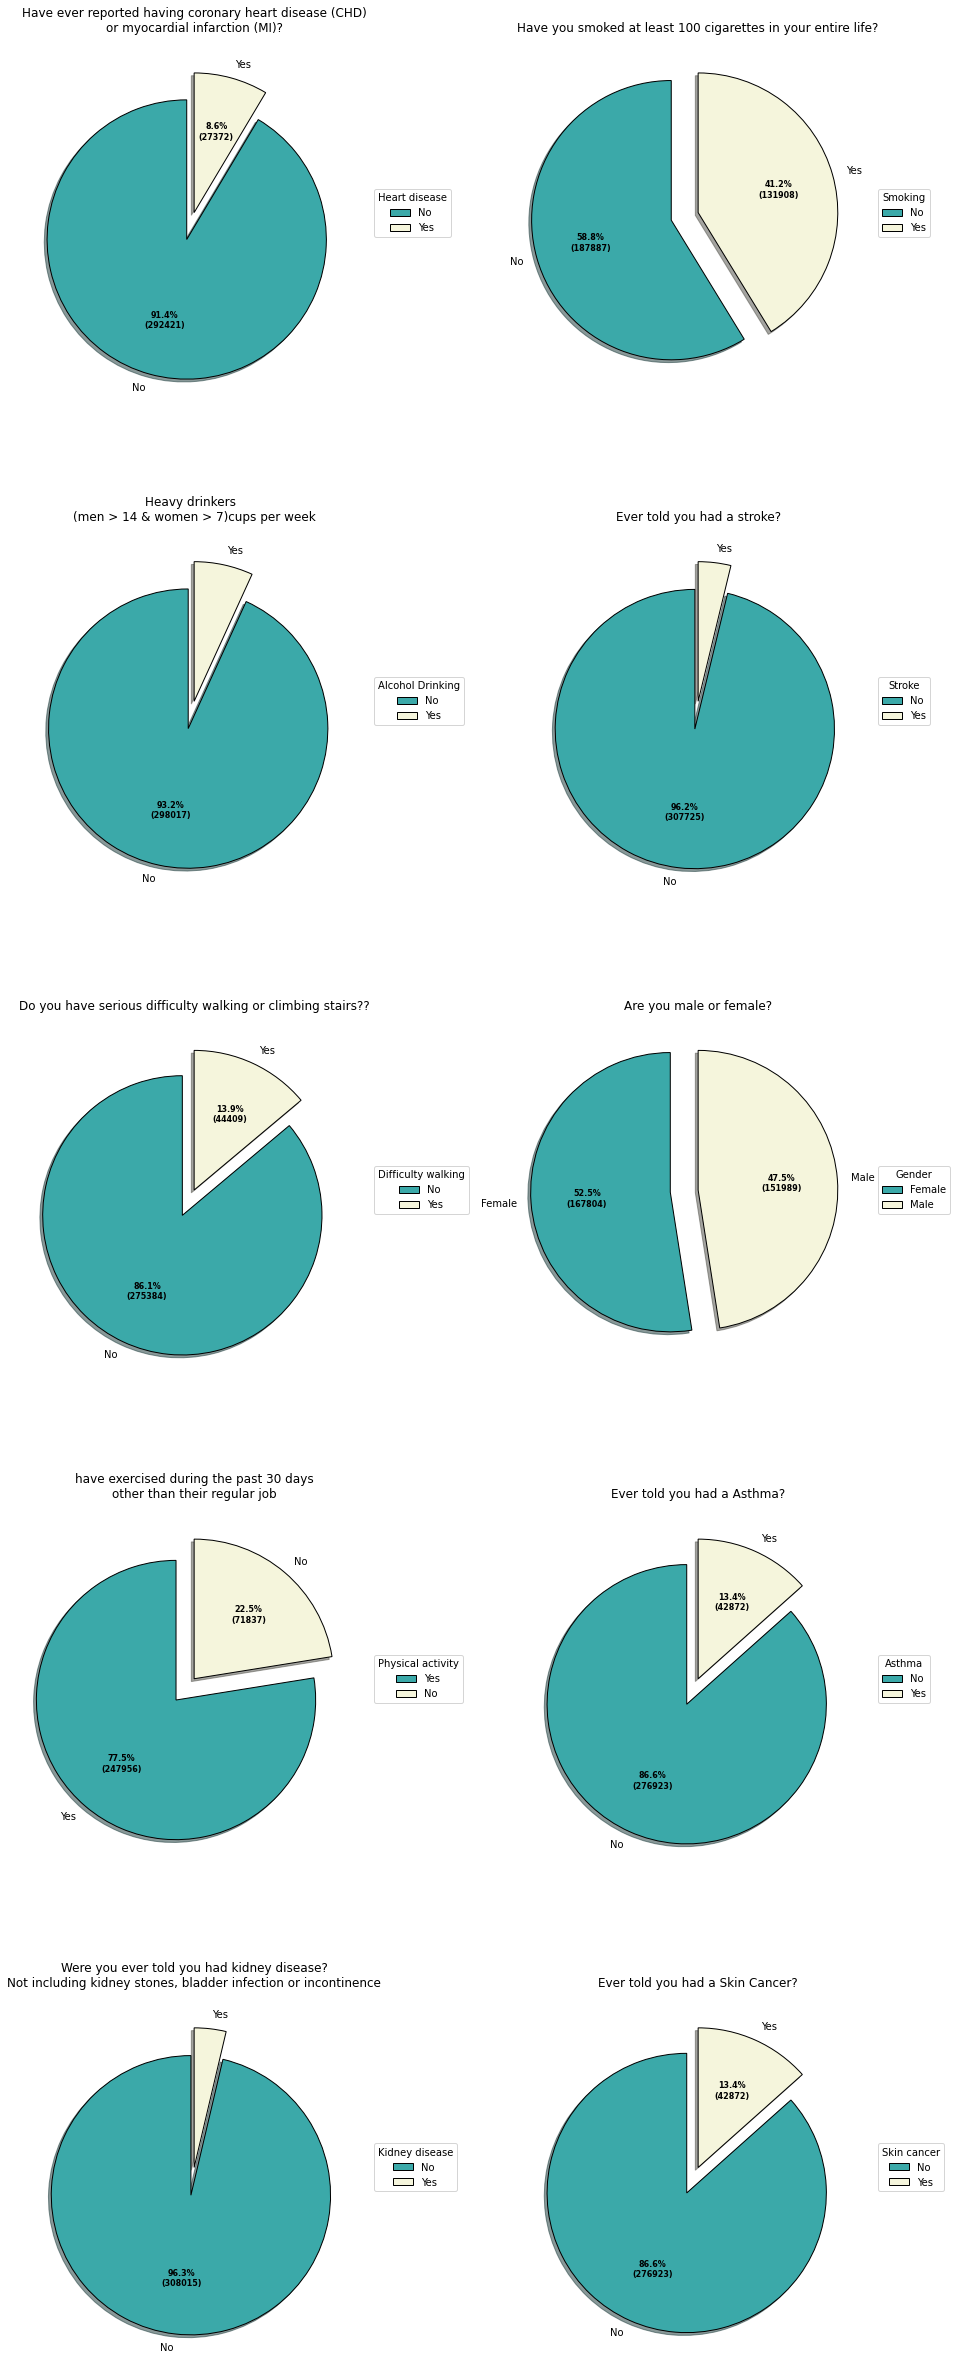

In [5]:
# Creating explode data
explode = (0.2, 0.0)
 
# Creating color parameters
colors = ("#3BA9A9", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

#----------------------------------------------------------------------

# Creating autocpt arguments
def pie(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute) if pct > 8 else ''

#-----------------------------------------------------------------------

# Creating plot
fig, axs = plt.subplots(5,2,figsize =(15, 40))
# set the spacing between subplots
plt.subplots_adjust(left=0., bottom=0.1, right=.8, top=0.9, wspace=0.4, hspace=0.4)

#-------------------------------------------------------------------------

# Heart disease
wedges1, texts1, autotexts1 = axs[0,0].pie(df.HeartDisease.value_counts(),
                                  autopct = lambda pct: pie(pct, df.HeartDisease.count()), explode = explode,
                                  labels = df.HeartDisease.value_counts().index, shadow = True, 
                                  colors = colors, startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
 
# Adding legend
axs[0,0].legend(wedges1, df.HeartDisease.value_counts().index, title='Heart disease',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts1, size = 8, weight ="bold")
axs[0,0].set_title("Have ever reported having coronary heart disease (CHD)\nor myocardial infarction (MI)?")

#-------------------------------------------------------------------------

# Smoking
wedges2, texts2, autotexts2 = axs[0,1].pie(df.Smoking.value_counts(),
                                  autopct = lambda pct: pie(pct, df.Smoking.value_counts()),explode = explode,
                                  labels = df.Smoking.value_counts().index, shadow = True, colors = colors,
                                  startangle = 90,wedgeprops = wp, textprops = dict(color ="black"))
 
# Adding legend
axs[0,1].legend(wedges2, df.Smoking.value_counts().index, title='Smoking',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts2, size = 8, weight ="bold")
axs[0,1].set_title("Have you smoked at least 100 cigarettes in your entire life?")
 
#-------------------------------------------------------------------------

# Alcohol Drinking
wedges3, texts3, autotexts3 = axs[1,0].pie(df.AlcoholDrinking.value_counts(),
                                  autopct = lambda pct: pie(pct, df.AlcoholDrinking.value_counts()), explode = explode,
                                  labels = df.AlcoholDrinking.value_counts().index, shadow = True, 
                                  colors = colors, startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
 
# Adding legend
axs[1,0].legend(wedges3, df.AlcoholDrinking.value_counts().index, title='Alcohol Drinking',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts3, size = 8, weight ="bold")
axs[1,0].set_title("Heavy drinkers  \n(men > 14 & women > 7)cups per week")

#-------------------------------------------------------------------------
# Stroke
wedges4, texts4, autotexts4 = axs[1,1].pie(df.Stroke.value_counts(),
                                  autopct = lambda pct: pie(pct, df.Stroke.value_counts()),explode = explode,
                                  labels = df.Stroke.value_counts().index, shadow = True, colors = colors,
                                  startangle = 90,wedgeprops = wp, textprops = dict(color ="black"))
 
# Adding legend
axs[1,1].legend(wedges4, df.Stroke.value_counts().index, title='Stroke',
          loc ="center left", bbox_to_anchor =(1, 0, .5, 1))
 
plt.setp(autotexts4, size = 8, weight ="bold")
axs[1,1].set_title("Ever told you had a stroke?")

#-------------------------------------------------------------------------

# DiffWalking
wedges5, texts5, autotexts5 = axs[2,0].pie(df.DiffWalking.value_counts(),
                                  autopct = lambda pct: pie(pct, df.DiffWalking.value_counts()), explode = explode,
                                  labels = df.DiffWalking.value_counts().index, shadow = True, 
                                  colors = colors, startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
 
# Adding legend
axs[2,0].legend(wedges5, df.DiffWalking.value_counts().index, title='Difficulty walking',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts5, size = 8, weight ="bold")
axs[2,0].set_title("Do you have serious difficulty walking or climbing stairs??")

#-------------------------------------------------------------------------

# Sex
wedges6, texts6, autotexts6 = axs[2,1].pie(df.Sex.value_counts(),
                                  autopct = lambda pct: pie(pct, df.Sex.value_counts()),explode = explode,
                                  labels = df.Sex.value_counts().index, shadow = True, colors = colors,
                                  startangle = 90,wedgeprops = wp, textprops = dict(color ="black"))
 
# Adding legend
axs[2,1].legend(wedges6, df.Sex.value_counts().index, title='Gender',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts6, size = 8, weight ="bold")
axs[2,1].set_title("Are you male or female?")
 
#-------------------------------------------------------------------------

# PhysicalActivity
wedges7, texts7, autotexts7 = axs[3,0].pie(df.PhysicalActivity.value_counts(),
                                  autopct = lambda pct: pie(pct, df.PhysicalActivity.value_counts()), explode = explode,
                                  labels = df.PhysicalActivity.value_counts().index, shadow = True, 
                                  colors = colors, startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
 
# Adding legend
axs[3,0].legend(wedges7, df.PhysicalActivity.value_counts().index, title='Physical activity',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts7, size = 8, weight ="bold")
axs[3,0].set_title("have exercised during the past 30 days\nother than their regular job")

#-------------------------------------------------------------------------

# Asthma
wedges8, texts8, autotexts8 = axs[3,1].pie(df.Asthma.value_counts(),
                                  autopct = lambda pct: pie(pct, df.Asthma.value_counts()),explode = explode,
                                  labels = df.Asthma.value_counts().index, shadow = True, colors = colors,
                                  startangle = 90,wedgeprops = wp, textprops = dict(color ="black"))
 
# Adding legend
axs[3,1].legend(wedges8, df.Asthma.value_counts().index, title='Asthma',
          loc ="center left", bbox_to_anchor =(1, 0, .5, 1))
 
plt.setp(autotexts8, size = 8, weight ="bold")
axs[3,1].set_title("Ever told you had a Asthma?")

#-------------------------------------------------------------------------

# KidneyDisease
wedges9, texts9, autotexts9 = axs[4,0].pie(df.KidneyDisease.value_counts(),
                                           autopct = lambda pct: pie(pct, df.KidneyDisease.value_counts()), explode = explode,
                                           labels = df.KidneyDisease.value_counts().index, shadow = True,
                                           colors = colors, startangle = 90, wedgeprops = wp, textprops = dict(color ="black"))
 
# Adding legend
axs[4,0].legend(wedges9, df.KidneyDisease.value_counts().index, title='Kidney disease',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts9, size = 8, weight ="bold")
axs[4,0].set_title("Were you ever told you had kidney disease?\nNot including kidney stones, bladder infection or incontinence")

#-------------------------------------------------------------------------

# SkinCancer
wedges10, texts10, autotexts10 = axs[4,1].pie(df.Asthma.value_counts(),
                                  autopct = lambda pct: pie(pct, df.SkinCancer.value_counts()),explode = explode,
                                  labels = df.SkinCancer.value_counts().index, shadow = True, colors = colors,
                                  startangle = 90,wedgeprops = wp, textprops = dict(color ="black"))
 
# Adding legend
axs[4,1].legend(wedges10, df.SkinCancer.value_counts().index, title='Skin cancer',
          loc ="center left", bbox_to_anchor =(1, 0, .5, 1))
 
plt.setp(autotexts10, size = 8, weight ="bold")
axs[4,1].set_title("Ever told you had a Skin Cancer?")

#-------------------------------------------------------------------------

# show plot
plt.show()

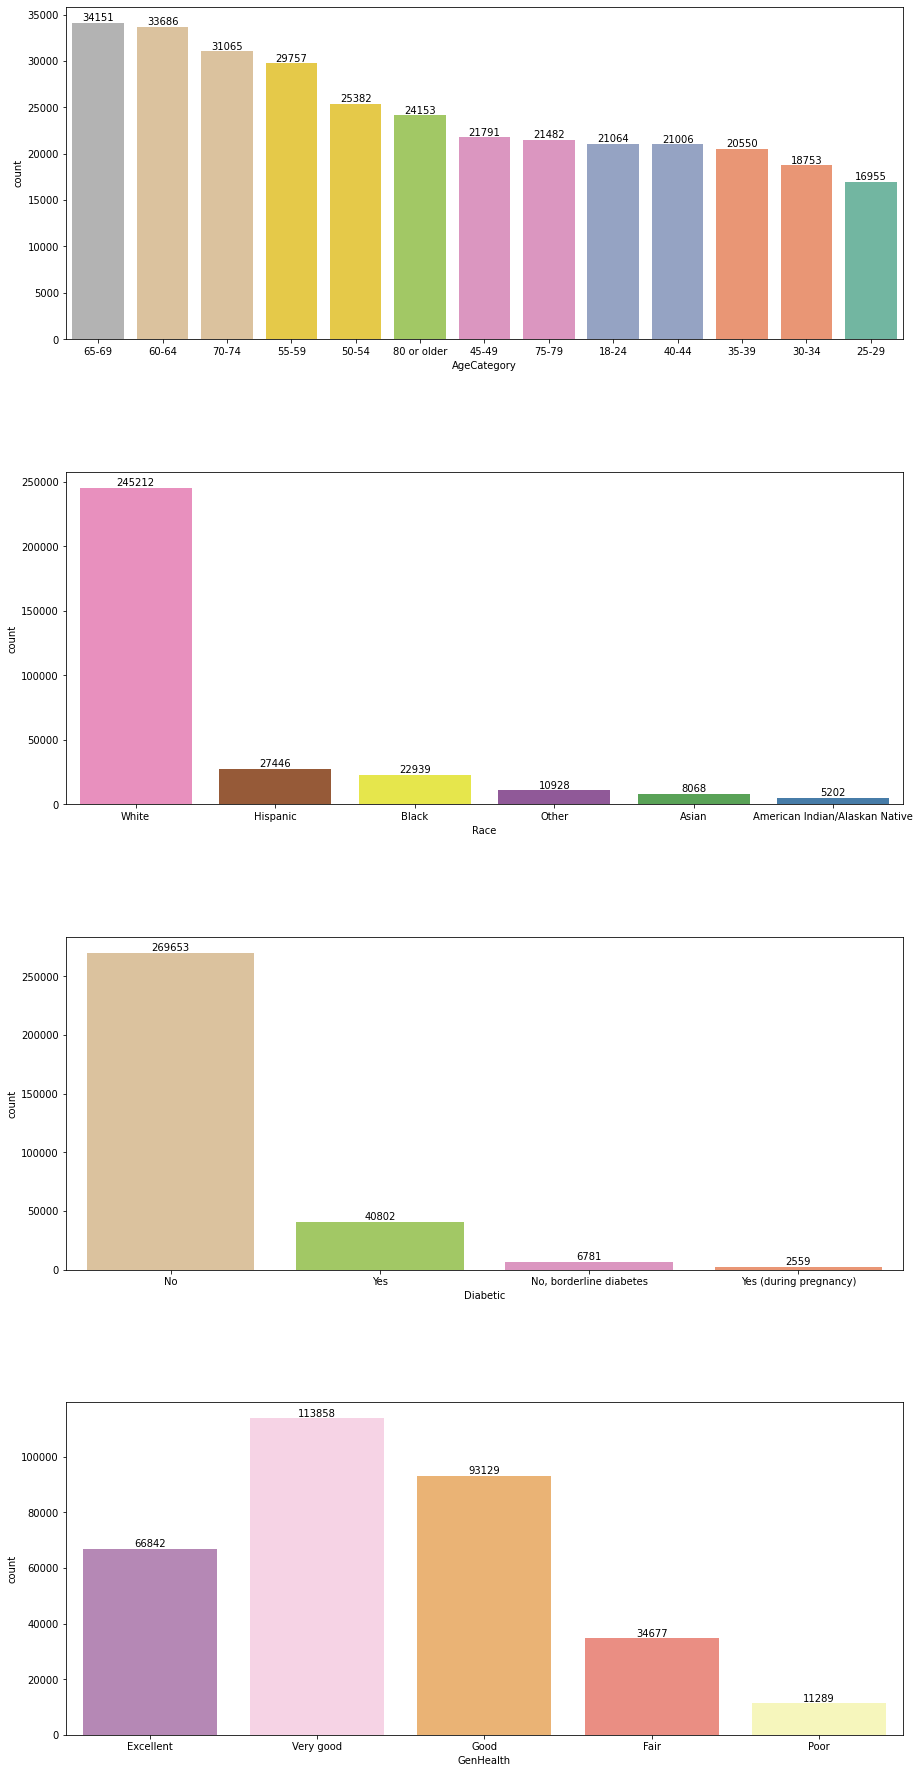

In [6]:
# Creating plot
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize =(15, 60))
# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.5, wspace=0.4, hspace=0.4)

#=--------------------------------------------------------------

ax1 = sns.countplot(df["AgeCategory"], ax = ax1, order = df["AgeCategory"].value_counts().index, palette="Set2_r")
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
#-------------------------------------------------------------------------

ax2 = sns.countplot(df["Race"], ax = ax2, order = df["Race"].value_counts().index, palette="Set1_r")
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
#-------------------------------------------------------------------------

ax3 = sns.countplot(df["Diabetic"], ax = ax3, order = df["Diabetic"].value_counts().index, palette="Set2_r")
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
#-------------------------------------------------------------------------

ax4 = sns.countplot(df["GenHealth"], ax = ax4, order = ['Excellent','Very good','Good','Fair','Poor'], palette="Set3_r")
for p in ax4.patches:
    ax4.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
#-------------------------------------------------------------------------

# show plot
plt.show()

## Relation between each column and Heart disease column

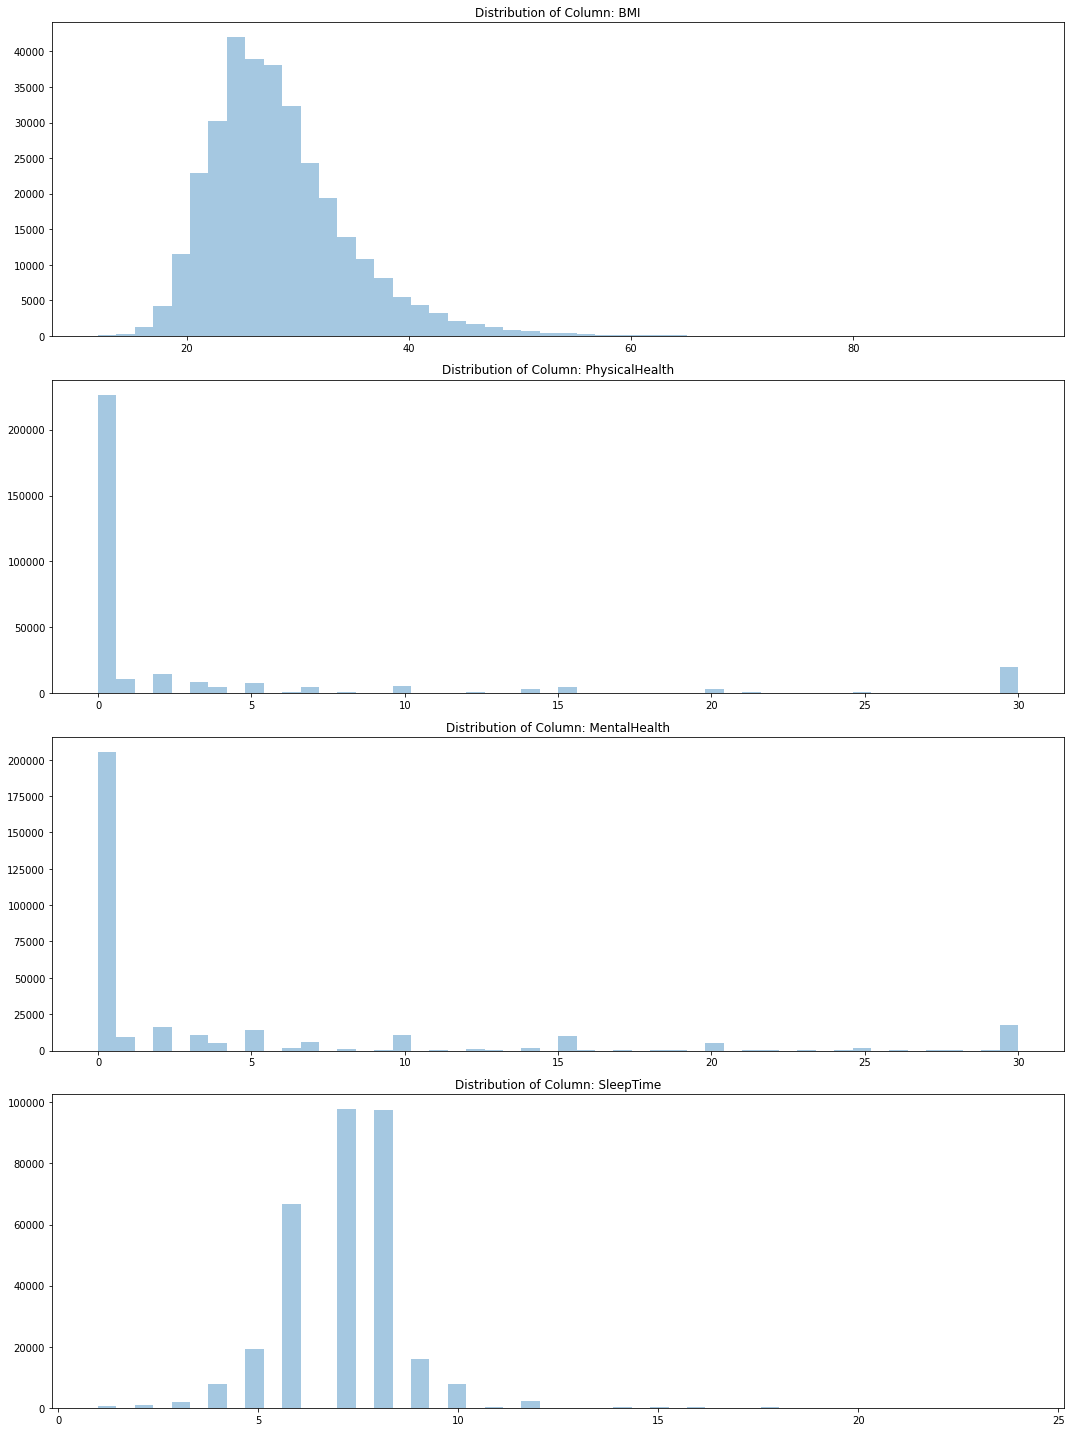

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20), sharey=False)
axes = axes.ravel()  # array to 1D
cols = ['BMI','PhysicalHealth','MentalHealth','SleepTime']  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    data = df[[col]]  # select the data
    sns.distplot( x=data, ax=ax, kde =False)
    ax.set(title=f'Distribution of Column: {col}', xlabel=None)
    
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='BMI', ylabel='HeartDisease'>

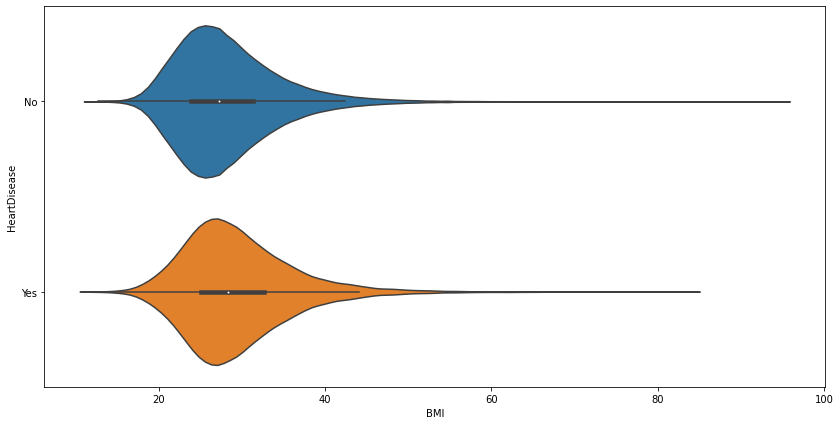

In [8]:
plt.figure(figsize=(14,7))
sns.violinplot(data=df, x="BMI", y="HeartDisease")

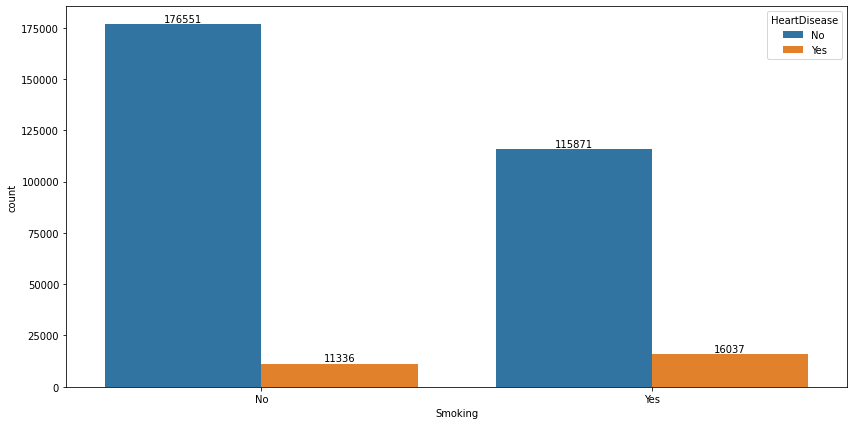

In [9]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["Smoking"], hue=df["HeartDisease"], 
                    order = df["Smoking"].value_counts().index, 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

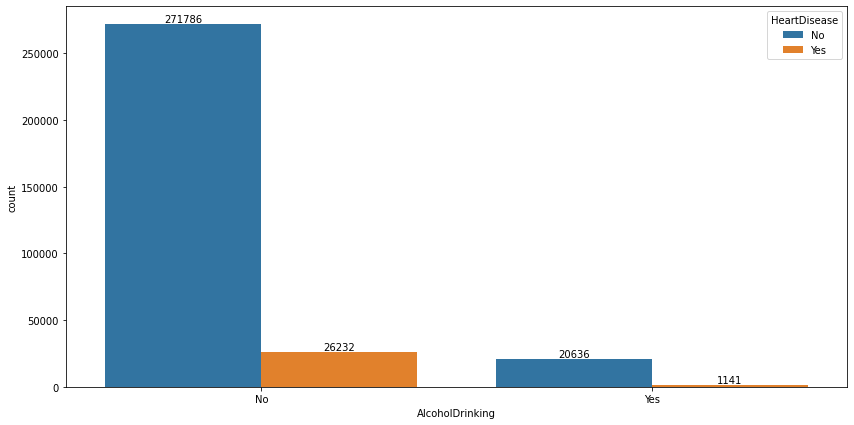

In [10]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["AlcoholDrinking"], hue=df["HeartDisease"], 
                    order = df["AlcoholDrinking"].value_counts().index, 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

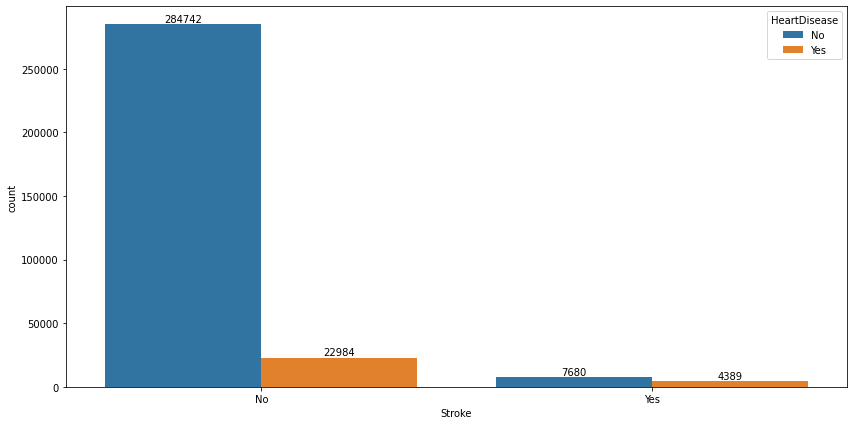

In [11]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["Stroke"], hue=df["HeartDisease"], 
                    order = df["Stroke"].value_counts().index, 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

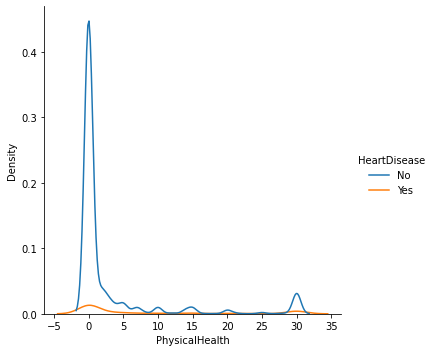

In [12]:
sns.displot(data=df, x="PhysicalHealth", hue="HeartDisease", kind="kde")

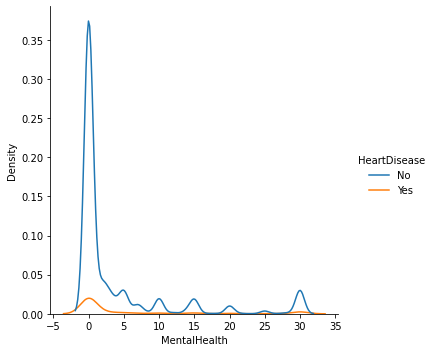

In [13]:
sns.displot(data=df, x="MentalHealth", hue="HeartDisease", kind="kde")

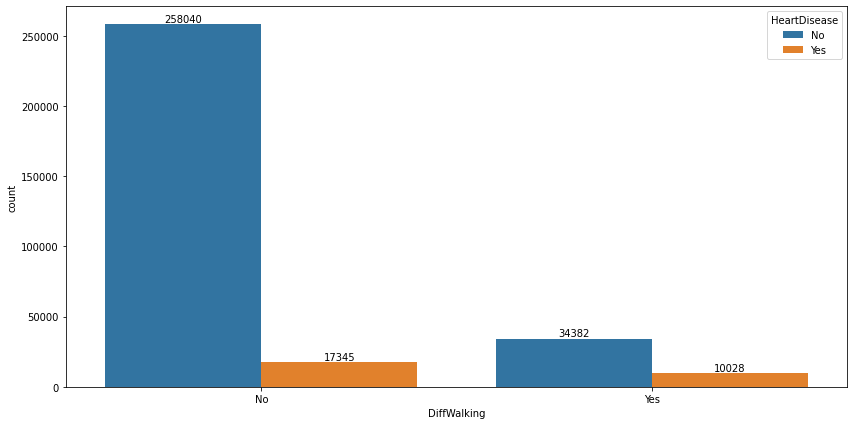

In [14]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["DiffWalking"], hue=df["HeartDisease"], 
                    order = df["DiffWalking"].value_counts().index, 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

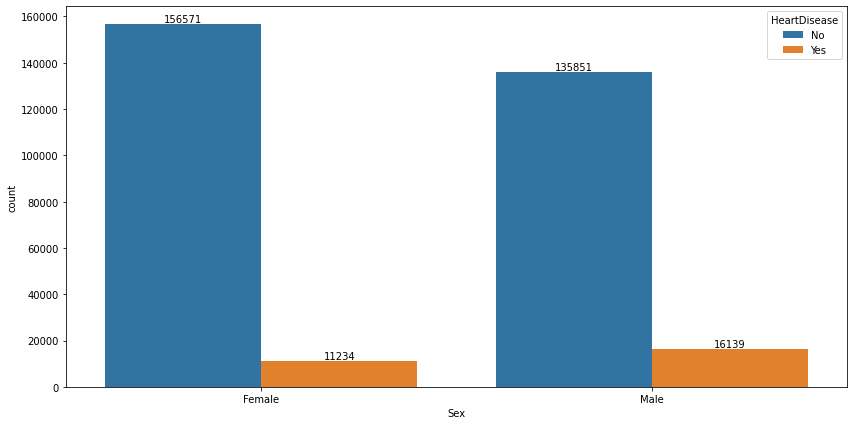

In [15]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["Sex"], hue=df["HeartDisease"], 
                    order = df["Sex"].value_counts().index, 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

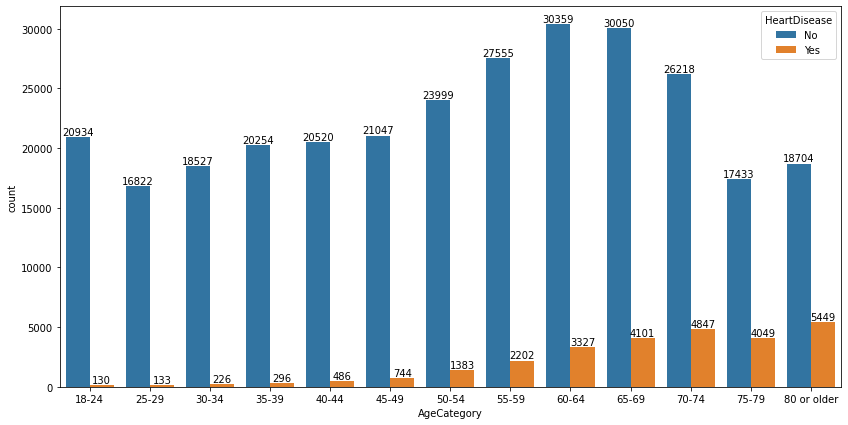

In [16]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["AgeCategory"], hue=df["HeartDisease"], 
                    order = ['18-24', '25-29', '30-34',  '35-39', '40-44', '45-49','50-54', 
                             '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'], 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

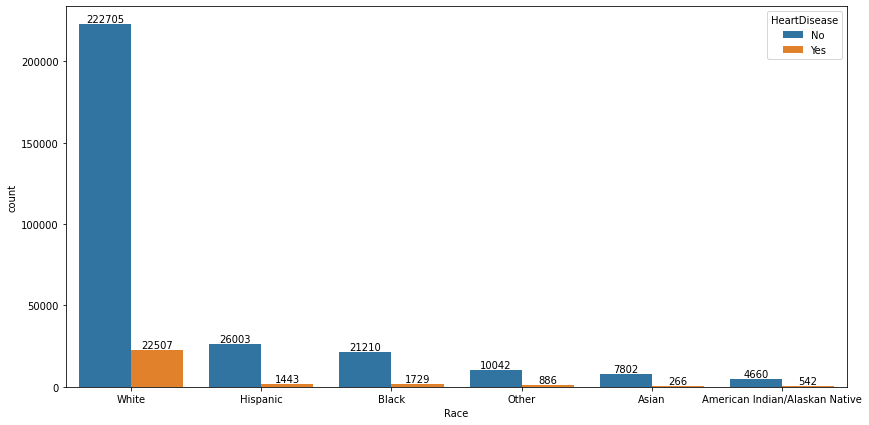

In [17]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["Race"], hue=df["HeartDisease"], 
                    order = df["Race"].value_counts().index, 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

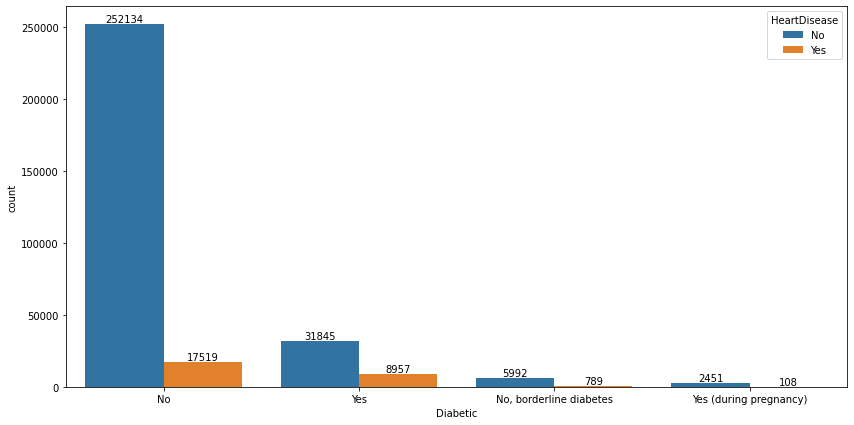

In [18]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["Diabetic"], hue=df["HeartDisease"], 
                    order = df["Diabetic"].value_counts().index, 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

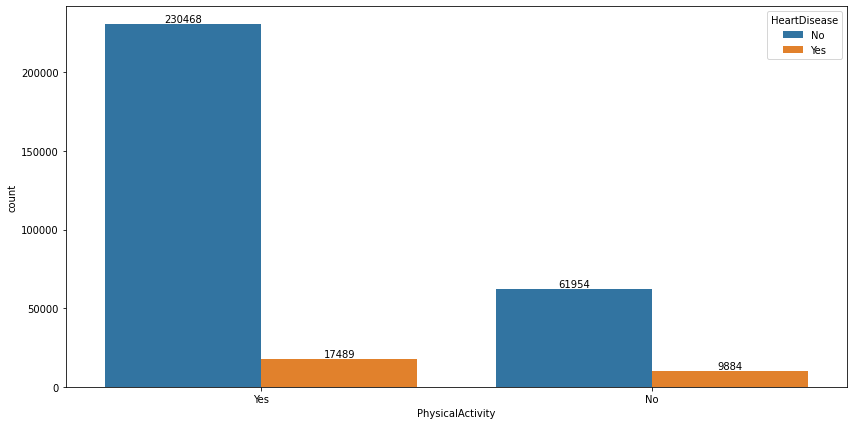

In [19]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["PhysicalActivity"], hue=df["HeartDisease"], 
                    order = df["PhysicalActivity"].value_counts().index, 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

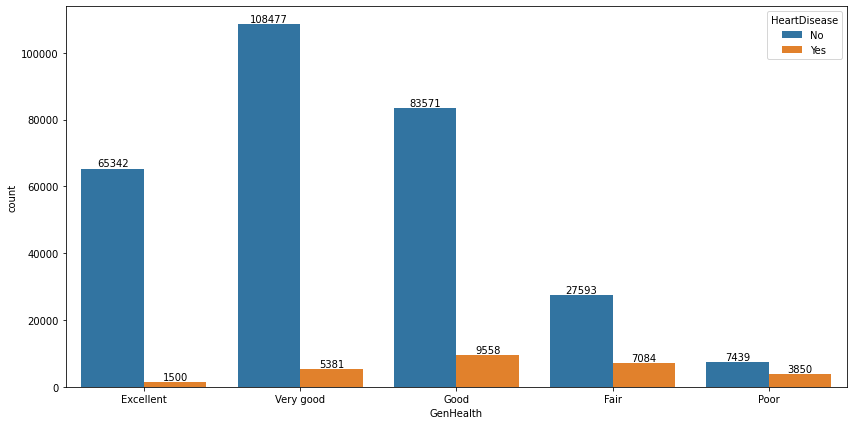

In [20]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["GenHealth"], hue=df["HeartDisease"], 
                    order = ['Excellent','Very good','Good','Fair','Poor'], 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

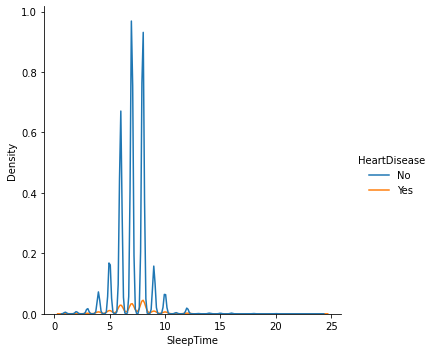

In [21]:
sns.displot(data=df, x="SleepTime", hue="HeartDisease", kind="kde")

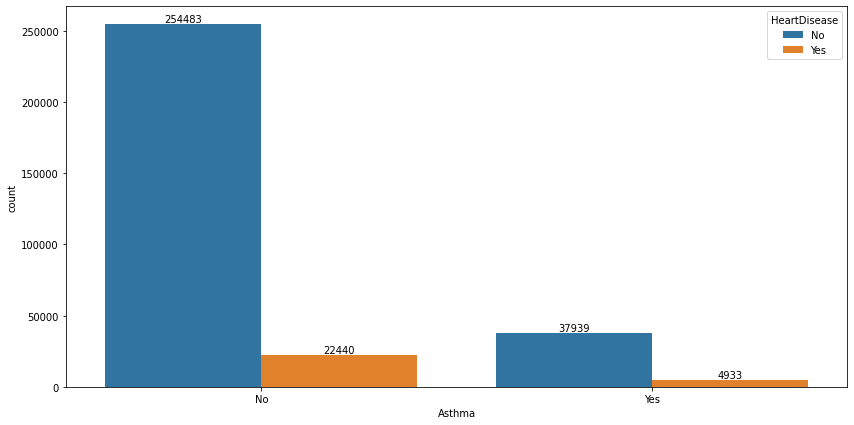

In [22]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["Asthma"], hue=df["HeartDisease"], 
                    order = df["Asthma"].value_counts().index, 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

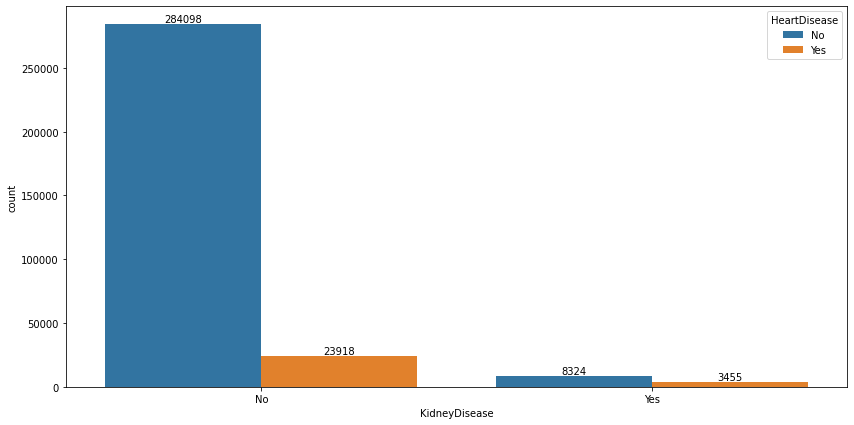

In [23]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["KidneyDisease"], hue=df["HeartDisease"], 
                    order = df["KidneyDisease"].value_counts().index, 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

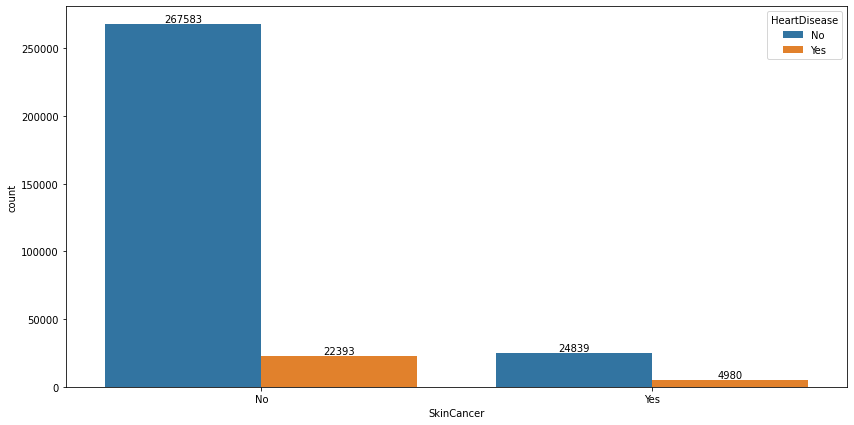

In [24]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = df["SkinCancer"], hue=df["HeartDisease"], 
                    order = df["SkinCancer"].value_counts().index, 
                    hue_order=['No','Yes'])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

## preprocessing

In [25]:
encodeing = {'Yes':1, 'No':0}
columns_to_encode = ['HeartDisease','Smoking','Stroke','DiffWalking',
                     'Asthma','KidneyDisease','SkinCancer']
for column in columns_to_encode:
    df[column]=df[column].replace(encodeing)

    
encodeing_rev = {'Yes':0, 'No':1}
df['PhysicalActivity']=df['PhysicalActivity'].replace(encodeing_rev)
df['AlcoholDrinking']=df['AlcoholDrinking'].replace(encodeing_rev)

encodeing_gender = {'Male':1,'Female':0}
df.Sex =df.Sex.replace(encodeing_gender)


encoding_age = {'55-59':7, '80 or older':12, '65-69':9, '75-79':11, '40-44':4, '70-74':10,
                '60-64':8, '50-54':6, '45-49':5, '18-24':0, '35-39':3, '30-34':2, '25-29':1}
df.AgeCategory =df.AgeCategory.replace(encoding_age)


Diabetic = {'Yes':2,'No, borderline diabetes':1,'Yes (during pregnancy)':0,'No':0}
df.Diabetic =df.Diabetic.replace(Diabetic)


Health = {'Very good':1, 'Fair':3, 'Good':2, 'Poor':4, 'Excellent':0}
df.GenHealth =df.GenHealth.replace(Health)


df = pd.get_dummies(df, columns = ['Race'])
df.drop(columns =['Race_Asian'], axis=1, inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  Diabetic                             319795 non-null  int64  
 11  PhysicalActiv

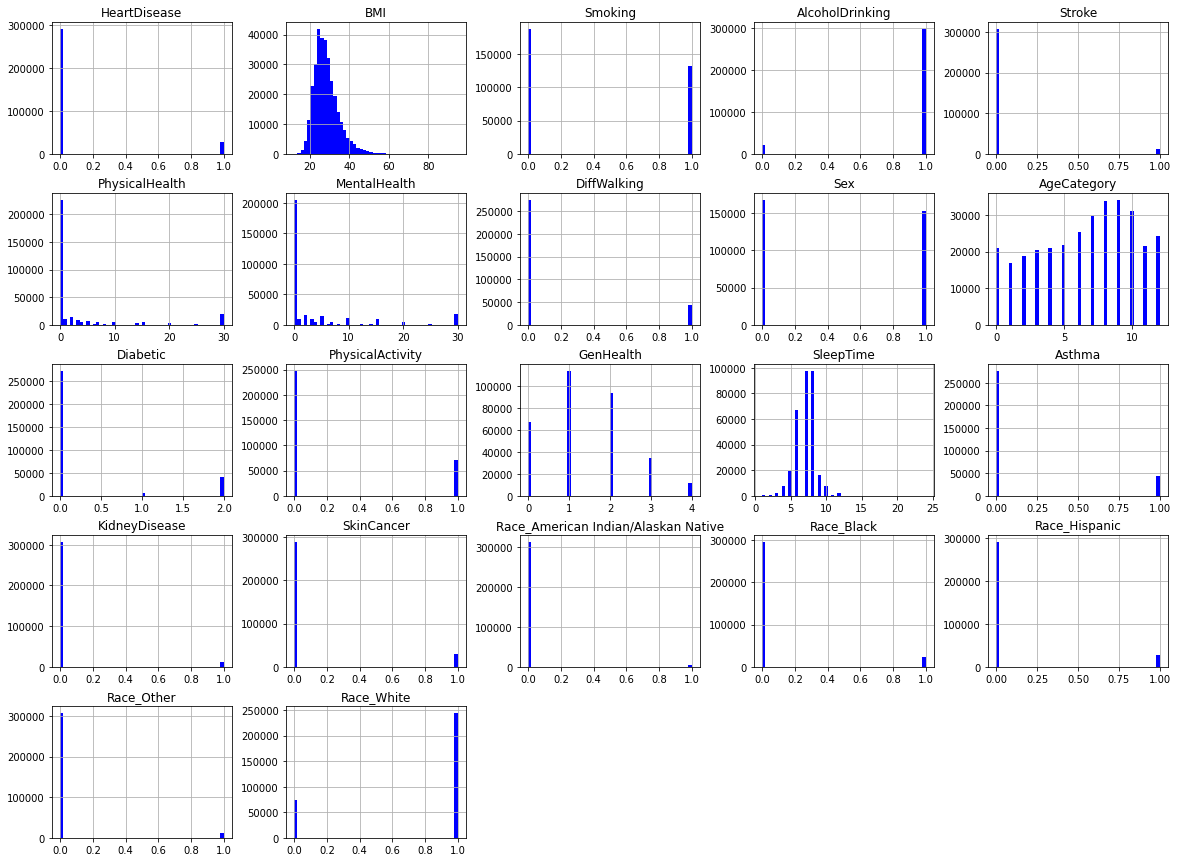

In [26]:
df.hist(bins=50, figsize=(20,15), color='b')
plt.show()

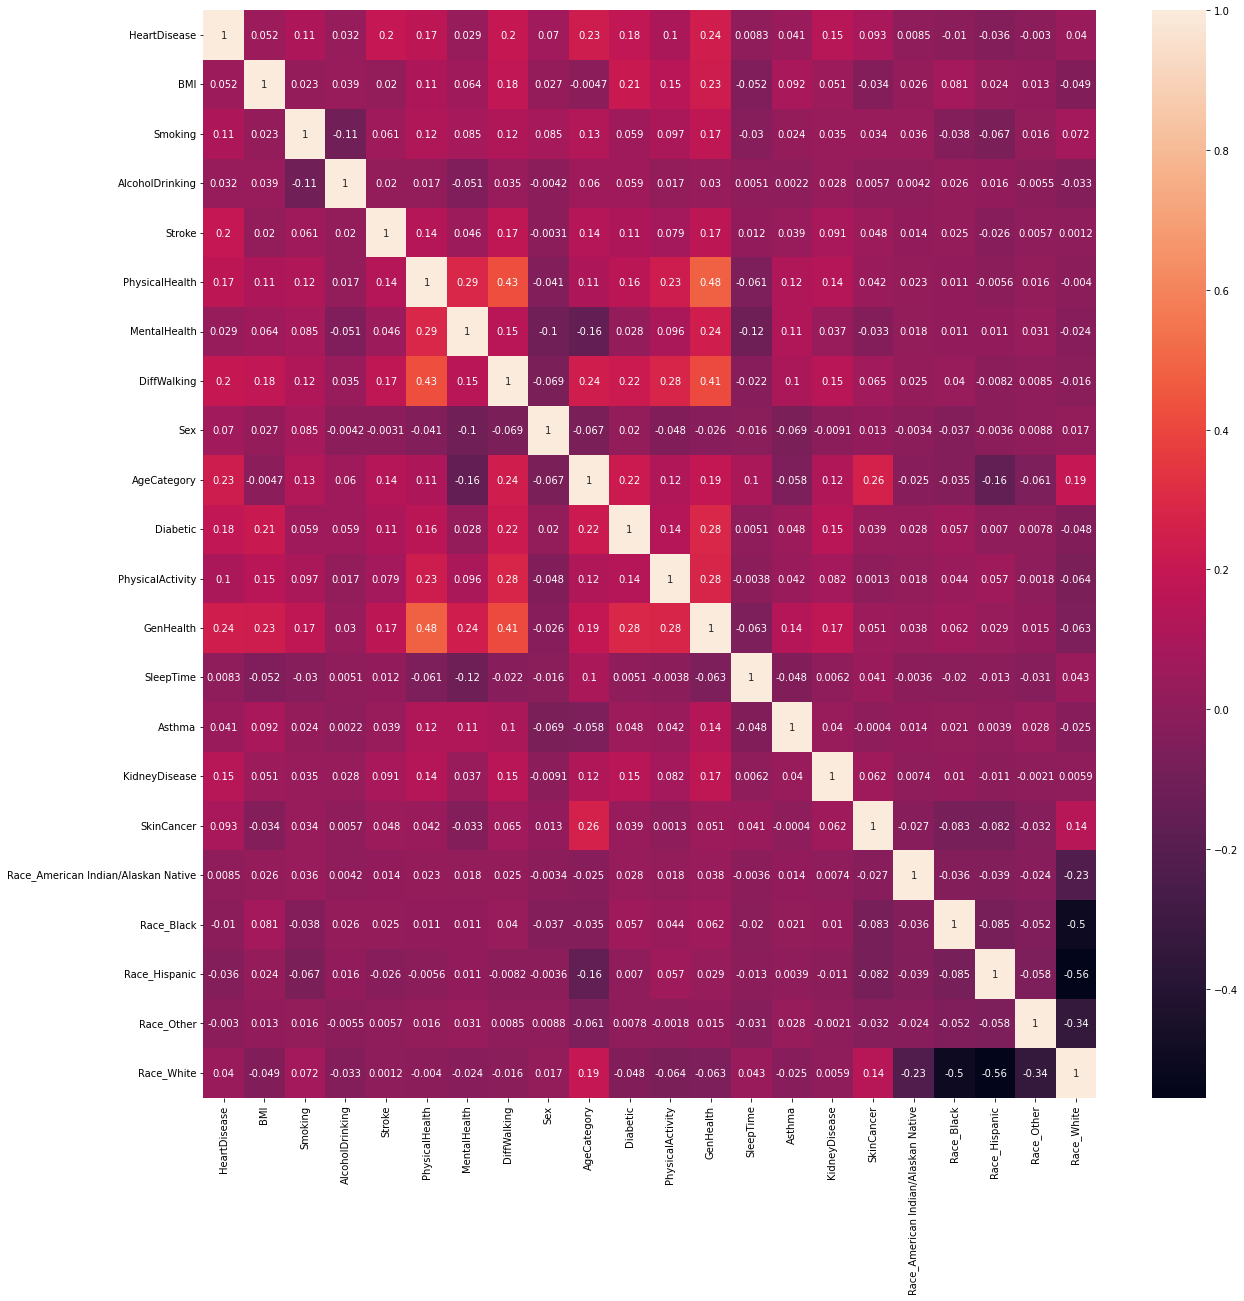

In [27]:
corr_matrix = df.corr()
plt.figure(figsize = (20,20))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

In [41]:
x = df.drop(['HeartDisease','MentalHealth','PhysicalHealth','SleepTime'],axis=1).values
y = df['HeartDisease'].values

## scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()
x = sd_scaler.fit_transform(x)

## data balancing

In [30]:
from imblearn.over_sampling  import RandomOverSampler
smoteOver = RandomOverSampler(sampling_strategy=1)
x_smoteOver, y_smoteOver = smoteOver.fit_resample(x,y)

In [31]:
x_smoteOver.shape , y_smoteOver.shape

((584844, 21), (584844,))

<AxesSubplot:ylabel='count'>

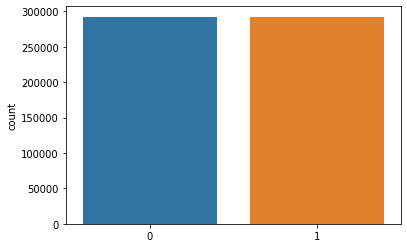

In [32]:
sns.countplot(y_smoteOver)

## spliting

In [33]:
from sklearn.model_selection import train_test_split
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_smoteOver, y_smoteOver ,test_size=0.2, shuffle=True, random_state=0)

# modeling

In [44]:
from sklearn.metrics import precision_score, classification_report, confusion_matrix, recall_score

from sklearn.metrics import accuracy_score

### Random forest 

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_rus = RandomForestClassifier(n_estimators=10,max_depth=14)

# Fit the parameters After oversampling:
rf_clf_rus.fit(x_train_rus, y_train_rus)

rf_clf_rus.score(x_train_rus,y_train_rus)

0.812471279722148

In [129]:
y_pred_rus = rf_clf_rus.predict(x_test_rus)
RFpred = accuracy_score(y_test_rus,y_pred_rus)
print("Accuracy",RFpred)

Accuracy 0.8021185100325727


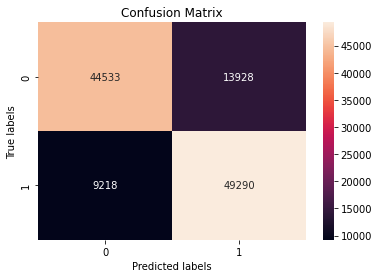

In [109]:
cm = confusion_matrix(y_test_rus,y_pred_rus)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [110]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79     58461
           1       0.78      0.84      0.81     58508

    accuracy                           0.80    116969
   macro avg       0.80      0.80      0.80    116969
weighted avg       0.80      0.80      0.80    116969



### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_rus,y_train_rus)
lr.score(x_train_rus,y_train_rus)

0.764471279722148

In [130]:
lr_rus_pred = lr.predict(x_test_rus)
LRpred = accuracy_score(y_test_rus,lr_rus_pred)
print("Accuracy",LRpred)

Accuracy 0.7630996246868829


In [114]:
print(classification_report(y_test_rus,lr_rus_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     58461
           1       0.76      0.78      0.77     58508

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969



### KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x_train_rus,y_train_rus)
knn.score(x_train_rus,y_train_rus)

In [ ]:
knn_rus_pred = knn.predict(x_test_rus)
KNNpred = accuracy_score(y_test_rus,knn_rus_pred)
print("Accuracy",KNNpred)

In [ ]:
cm = confusion_matrix(y_test_rus,knn_rus_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [ ]:
print(classification_report(y_test_rus,knn_rus_pred))

### Decision tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier(max_depth=14)

# Train Decision Tree Classifer
dt_clf.fit(x_train_rus, y_train_rus)

dt_clf.score(x_train_rus,y_train_rus)

0.8136767298958055

In [131]:
#Predict the response for test dataset
y_pred_rus_dt = dt_clf.predict(x_test_rus)
DTpred = accuracy_score(y_test_rus,y_pred_rus_dt)
print("Accuracy",DTpred)

Accuracy 0.8018620318203968


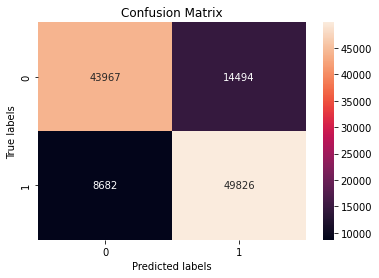

In [125]:
cm = confusion_matrix(y_test_rus,y_pred_rus_dt)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [126]:
print(classification_report(y_test_rus,y_pred_rus_dt))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79     58461
           1       0.77      0.85      0.81     58508

    accuracy                           0.80    116969
   macro avg       0.80      0.80      0.80    116969
weighted avg       0.80      0.80      0.80    116969



## XGBoost

In [35]:
import xgboost as xgb

In [89]:
xgb_classifier = xgb.XGBClassifier(n_estimatorsint=50)
xgb_classifier.fit(x_train_rus, y_train_rus)
xgb_classifier.score(x_train_rus, y_train_rus)

[02:53:11] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimatorsint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.7915682607534064

In [132]:
predictions = xgb_classifier.predict(x_test_rus)
XGBpred = accuracy_score(y_test_rus,predictions)
print("Accuracy of Model",XGBpred)

Accuracy of Model 0.7864134941736699


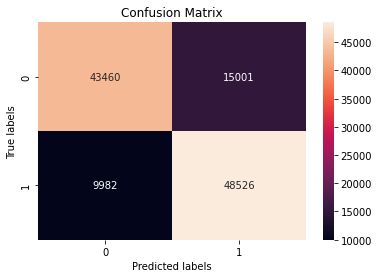

In [61]:
cm = confusion_matrix(y_test_rus,predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [46]:
print(classification_report(y_test_rus,predictions))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78     58461
           1       0.76      0.83      0.80     58508

    accuracy                           0.79    116969
   macro avg       0.79      0.79      0.79    116969
weighted avg       0.79      0.79      0.79    116969



## catboost

In [50]:
import catboost as ctb

In [56]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(x_train_rus, y_train_rus)

Learning rate set to 0.142259
0:	learn: 0.6400509	total: 67.5ms	remaining: 1m 7s
1:	learn: 0.6016651	total: 130ms	remaining: 1m 4s
2:	learn: 0.5766161	total: 195ms	remaining: 1m 4s
3:	learn: 0.5556012	total: 260ms	remaining: 1m 4s
4:	learn: 0.5418757	total: 321ms	remaining: 1m 3s
5:	learn: 0.5301928	total: 381ms	remaining: 1m 3s
6:	learn: 0.5214202	total: 441ms	remaining: 1m 2s
7:	learn: 0.5149164	total: 500ms	remaining: 1m 2s
8:	learn: 0.5094958	total: 560ms	remaining: 1m 1s
9:	learn: 0.5052412	total: 622ms	remaining: 1m 1s
10:	learn: 0.5022508	total: 684ms	remaining: 1m 1s
11:	learn: 0.4995752	total: 746ms	remaining: 1m 1s
12:	learn: 0.4974224	total: 806ms	remaining: 1m 1s
13:	learn: 0.4955943	total: 864ms	remaining: 1m
14:	learn: 0.4942223	total: 928ms	remaining: 1m
15:	learn: 0.4928625	total: 985ms	remaining: 1m
16:	learn: 0.4918226	total: 1.04s	remaining: 1m
17:	learn: 0.4909293	total: 1.1s	remaining: 60s
18:	learn: 0.4902758	total: 1.16s	remaining: 1m
19:	learn: 0.4895226	total: 

In [57]:
model_CBC.score(x_train_rus, y_train_rus)

0.8028768367619556

In [133]:
predicted_y = model_CBC.predict(x_test_rus)
CATpred = accuracy_score(y_test_rus,predicted_y)
print("Accuracy of Model",CATpred)

Accuracy of Model 0.795364583778608


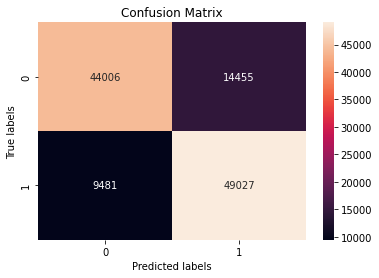

In [60]:
cm = confusion_matrix(y_test_rus,predicted_y)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [59]:
print(classification_report(y_test_rus,predicted_y))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79     58461
           1       0.77      0.84      0.80     58508

    accuracy                           0.80    116969
   macro avg       0.80      0.80      0.79    116969
weighted avg       0.80      0.80      0.79    116969



## function

RFpred:80.21185100325727
LRpred:76.30996246868828
DTpred:80.18620318203969
XGBpred:78.641349417367
CATpred:79.5364583778608


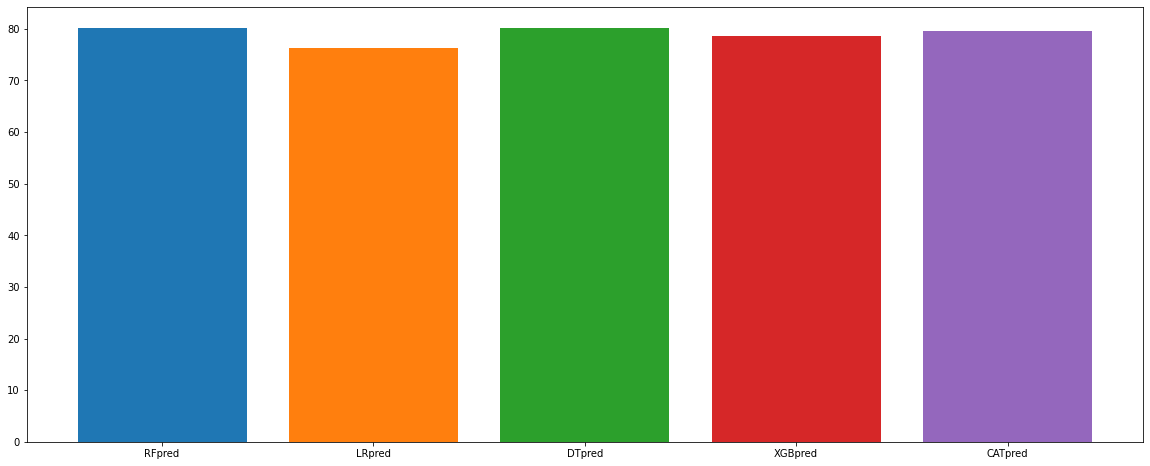

In [155]:
accuracies_list = [('RFpred',RFpred),('LRpred',LRpred),('DTpred',DTpred),('XGBpred',XGBpred),('CATpred',CATpred)]
for name , value in accuracies_list:
    print(f'{name}:{value*100}')
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(name,value*100)